# Notebook containing various visualizations of CALVIN dataset

In [2]:

from utils.visualize import visualize, showImages
import config as CFG
import numpy as np
from PIL import Image
import yaml
import matplotlib.pyplot as plt
import cv2

'''
    used functions
'''
def get_index_at_caption(ann, index, path):
        annotations = np.load('{}/lang_annotations/auto_lang_ann.npy'.format(path), allow_pickle=True).item()
        annotations = list(zip(annotations["info"]["indx"], annotations["language"]["ann"]))
        for annotation in annotations:
                if annotation[1] != ann:
                        continue
                if not (index[0] <= annotation[0][0] and annotation[0][1] <= index[1]):
                        continue
                return annotation[0][0], path
        
def get_indices_at_caption(ann, index, path, num=5):
        annotations = np.load('{}/lang_annotations/auto_lang_ann.npy'.format(path), allow_pickle=True).item()
        annotations = list(zip(annotations["info"]["indx"], annotations["language"]["ann"]))
        counter = 0
        result_arr = []
        for annotation in annotations:
                if annotation[1] != ann:
                        continue
                if not (index[0] <= annotation[0][0] and annotation[0][1] <= index[1]):
                        continue
                result_arr.append((annotation[0][0], path))
                counter += 1
                if counter >= num: 
                        return result_arr
        return result_arr

def create_video(indices, name):
        fourcc = cv2.VideoWriter_fourcc(*'XVID')    
        out = cv2.VideoWriter(f'videos/{name}.avi', fourcc, 20.0, (1600,800))    
        for i in range(0,64):
                plt.figure(figsize=(2, 1), dpi=800)
                plot_index = 1
                for d in ["rgb_static", "rgb_gripper"]:
                        for index in indices:
                                frame = np.load(f"{index[1]}/episode_{index[0]+i:07d}.npz", allow_pickle=True)
                                img = frame[d]
                                plt.subplot(2, 4, plot_index)
                                plt.axis('off')
                                plt.imshow(img)
                                plot_index += 1

               # plt.savefig('videos/temp_image.png')     
               # img = cv2.imread('videos/temp_image.png') 
                fig = plt.gcf()
                fig.canvas.draw()
                img = np.array(fig.canvas.renderer.buffer_rgba())
                img = cv2.cvtColor(img[:, :, :3], cv2.COLOR_RGB2BGR)
               # print(img.shape)
                out.write(img)
                plt.close()
        out.release()

Test visulization

In [2]:
visualize()

{'calvin_scene_D': [0, 611098]}
[((315660, 315724), 'move the door to the left side'), ((191730, 191794), 'slide the door to the left side'), ((305439, 305503), 'slide down the switch'), ((340730, 340794), 'toggle the button to turn on the green light'), ((542337, 542401), 'toggle the light switch to turn on the yellow light'), ((536830, 536894), 'push the switch upwards'), ((575627, 575691), 'push down the button to turn on the led'), ((80243, 80307), 'open the cabinet drawer'), ((68433, 68497), 'grasp the drawer handle and open it'), ((370674, 370738), 'move up the switch'), ((526635, 526699), 'pull the handle of the drawer'), ((485616, 485680), 'move the sliding door to the left'), ((473791, 473839), 'put the block in the drawer'), ((201910, 201957), 'toggle the light switch to turn off the light bulb'), ((292365, 292429), 'move the door to the right side'), ((425910, 425974), 'turn on the yellow light'), ((91077, 91141), 'grasp the blue block and lift it up'), ((610343, 610407), 't

print distribution of captions

In [3]:
path = CFG.datapath_training + "/lang_annotations/auto_lang_ann.npy"
#path = CFG.datapath_val_abcd + "/lang_annotations/auto_lang_ann.npy"

annotations = np.load(path, allow_pickle=True).item()
print(list(annotations['language'].keys()))
annotations = annotations["language"]["ann"]


unique, counts = np.unique(annotations, return_counts=True)
print(dict(zip(unique, counts)))

['ann', 'task', 'emb']
{'close the cabinet drawer': 18, 'close the drawer': 14, 'collapse the stacked blocks': 18, 'go close the drawer': 18, 'go open the drawer': 13, 'go push the blue block to the left': 16, 'go push the blue block to the right': 13, 'go push the pink block to the left': 15, 'go push the pink block to the right': 16, 'go push the red block to the left': 12, 'go push the red block to the right': 11, 'go slide the blue block to the left': 28, 'go slide the blue block to the right': 17, 'go slide the pink block to the left': 17, 'go slide the pink block to the right': 23, 'go slide the red block to the left': 20, 'go slide the red block to the right': 12, 'go to the tower of blocks and take off the top one': 25, 'go towards the blue block in the drawer and grasp it': 17, 'go towards the blue block in the drawer and lift it': 18, 'go towards the blue block in the drawer and pick it up': 13, 'go towards the drawer and place the object': 10, 'go towards the drawer and stor

visualizes one action in all four enviornments

Enviorment:  calvin_scene_B
Caption:  turn off the led lamp


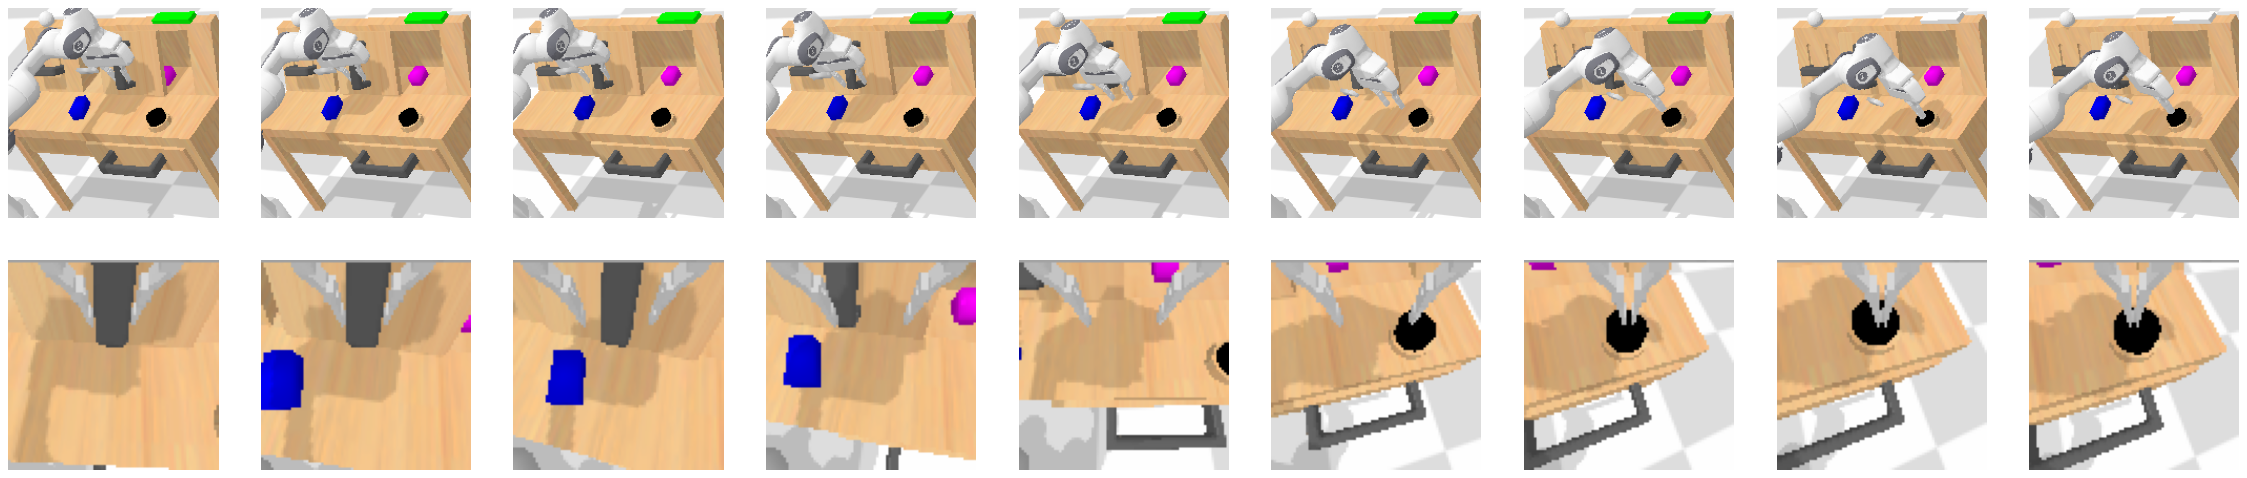

Caption count for enviornment: calvin_scene_B  :  14  


Enviorment:  calvin_scene_C
Caption:  turn off the led lamp


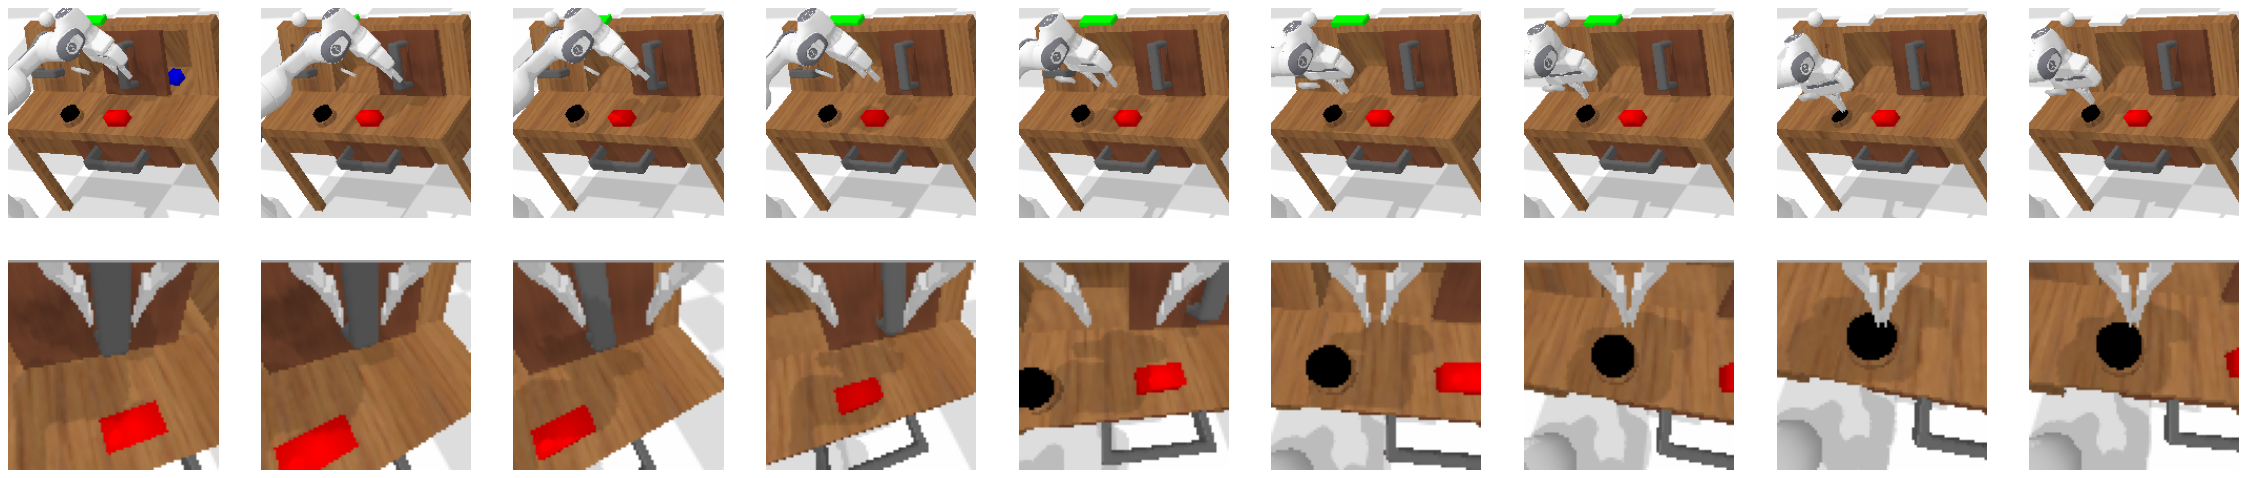

Caption count for enviornment: calvin_scene_C  :  12  


Enviorment:  calvin_scene_A
Caption:  turn off the led lamp


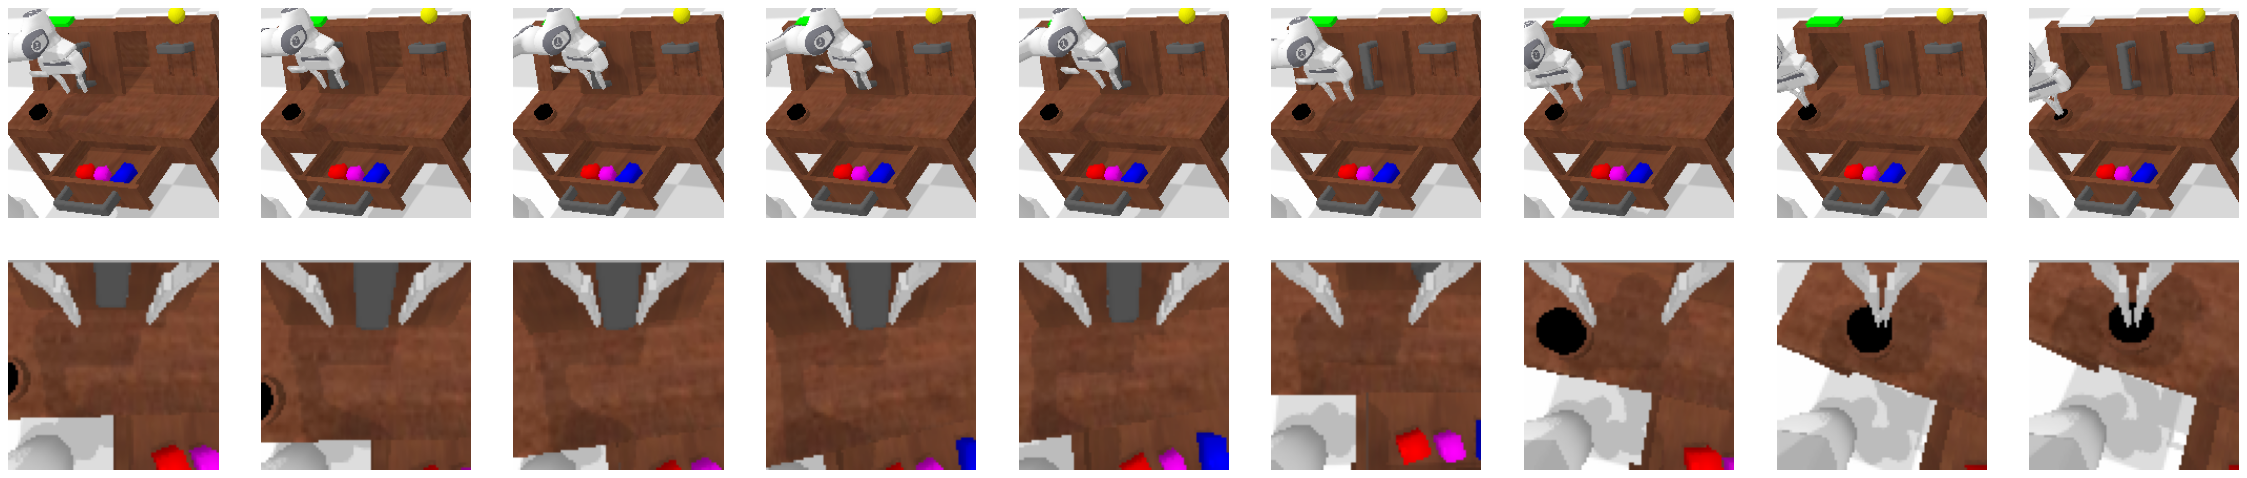

Caption count for enviornment: calvin_scene_A  :  11  


Enviorment:  calvin_scene_D_validation
Caption:  turn off the led lamp


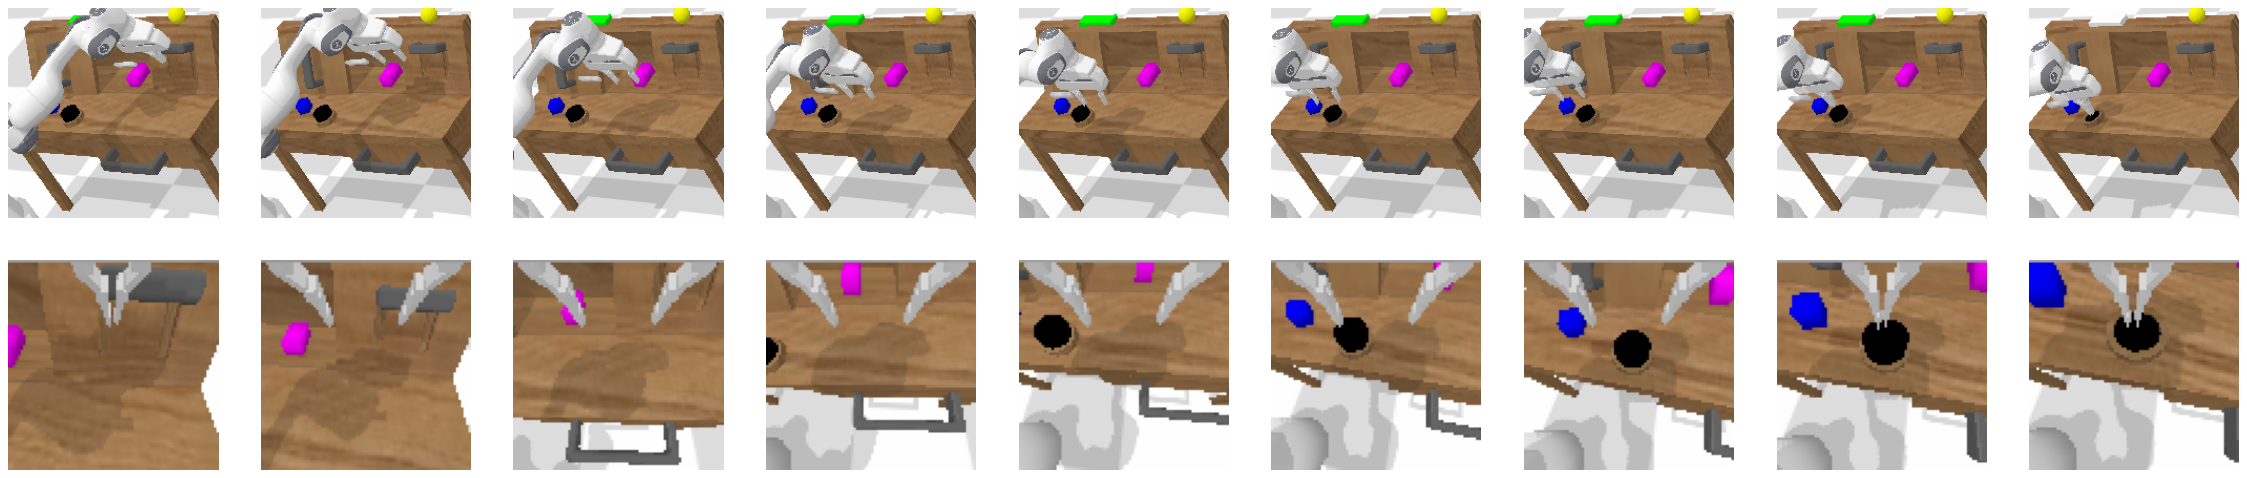

Caption count for enviornment: calvin_scene_D_validation  :  3  


In [4]:

def show_ann_for_env(ann, env, index, path):
        print('Enviorment: ', env)
        print('Caption: ', ann)
        counter = 0
        first = True
        annotations = np.load('{}/lang_annotations/auto_lang_ann.npy'.format(path), allow_pickle=True).item()
        annotations = list(zip(annotations["info"]["indx"], annotations["language"]["ann"]))
        for annotation in annotations:
                if annotation[1] != ann:
                        continue
                if not (index[0] <= annotation[0][0] and annotation[0][1] <= index[1]):
                        continue
                if first:
                        showImages(annotation[0][0], path)
                       # showImages(annotation[0][0], path, range=[0, 8, 16, 24, 32, 40, 48, 56, 64])
                first = False
                counter += 1
        print('Caption count for enviornment:', env, ' : ', counter, ' \n\n')

path = CFG.datapath_training_abcd
scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
target_ann = "turn off the led lamp"
for env, index in scene_info.items():
        show_ann_for_env(target_ann, env, index, path)

path = CFG.datapath_val_abcd
# scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
# for env, index in scene_info.items():
show_ann_for_env(target_ann, "calvin_scene_D_validation", (0, 10000000), path)



Hulc 2 Real World dataset

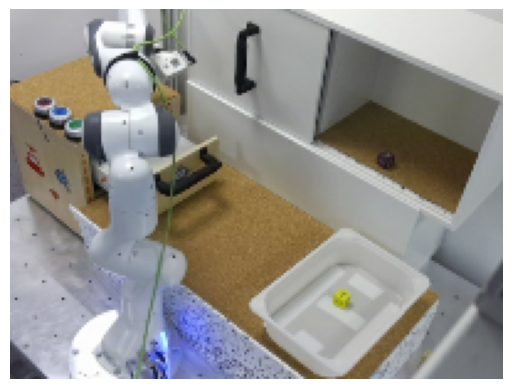

In [5]:
'''
    Hulc 2 real world dataset must be downloaded for this:
    https://www.kaggle.com/datasets/oiermees/taco-robot
    this dataset isn't used for any of the models
'''

path = '/media/tim/E/hulc_2_real'
frame = np.load("/media/tim/E/episode_0014233.npz", allow_pickle=True)
img = frame["rgb_static"]
plt.imshow(img)
plt.axis('off')
plt.savefig("real_world_hulc_2.png", bbox_inches='tight')
plt.show()


videos comparing each enviornment preforming the same task

saves videos as videos/task.avi 

In [6]:
target_anns = [('move_slider_left', "grasp the door handle, then slide the door to the left"),
               ("rotate_red_block_right", 'grasp the red block, then rotate it right'),
               ("push_pink_block_right", 'go push the pink block to the right'),
               ("close_drawer", 'close the drawer'),
               ("place_in_slider", 'place the block in the sliding cabinet'),
               ("turn_on_lightbulb", 'turn on the light bulb'),
               ("turn_off_led", 'turn off the led lamp')]

for ann in target_anns:
        path = CFG.datapath_training_abcd
        scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
        indices = []
        for env, index in scene_info.items():
                index = get_index_at_caption(ann[1], index, path)
                indices.append(index)
        path = CFG.datapath_val_abcd
        index = get_index_at_caption(ann[1], (0, 10000000), path)
        indices.append(index)
        print(indices)
        create_video(indices, ann[0])


[(90670, '/media/tim/E/task_ABC_D/training'), (695095, '/media/tim/E/task_ABC_D/training'), (1342758, '/media/tim/E/task_ABC_D/training'), (1872, '/media/tim/E/task_ABC_D/validation')]
[(94207, '/media/tim/E/task_ABC_D/training'), (637840, '/media/tim/E/task_ABC_D/training'), (1432107, '/media/tim/E/task_ABC_D/training'), (13018, '/media/tim/E/task_ABC_D/validation')]
[(10459, '/media/tim/E/task_ABC_D/training'), (1051116, '/media/tim/E/task_ABC_D/training'), (1269338, '/media/tim/E/task_ABC_D/training'), (34355, '/media/tim/E/task_ABC_D/validation')]
[(257858, '/media/tim/E/task_ABC_D/training'), (806230, '/media/tim/E/task_ABC_D/training'), (1196242, '/media/tim/E/task_ABC_D/training'), (1717, '/media/tim/E/task_ABC_D/validation')]
[(213579, '/media/tim/E/task_ABC_D/training'), (1114422, '/media/tim/E/task_ABC_D/training'), (1729456, '/media/tim/E/task_ABC_D/training'), (2200, '/media/tim/E/task_ABC_D/validation')]
[(545129, '/media/tim/E/task_ABC_D/training'), (915622, '/media/tim/E

comparing start and end image per task in diffrent enviornments

In [11]:
output_dir =  'img_first_last/'

def show_first_and_last(ind_arr: []):
        for d in ["rgb_static", "rgb_gripper"]:
                image_first_final = np.array([])
                image_last_final = np.array([])

                for index in ind_arr:
                        # print(index)
                        frame = np.load(f"{index[1]}/episode_{index[0]:07d}.npz", allow_pickle=True)
                        img_first = frame[d]
                        image_pil = Image.fromarray(img_first)
                        image_pil = image_pil.resize((200, 200))
                        img_first = np.array(image_pil)

                        frame = np.load(f"{index[1]}/episode_{index[0]+64:07d}.npz", allow_pickle=True)
                        img_last = frame[d]
                        image_pil = Image.fromarray(img_last)
                        image_pil = image_pil.resize((200, 200))
                        img_last = np.array(image_pil)
                        if image_first_final.size == 0:
                                image_first_final = img_first
                        else:
                                image_first_final = np.hstack((image_first_final, img_first))     
                        if image_last_final.size == 0:
                                image_last_final = img_last
                        else:
                                image_last_final = np.hstack((image_last_final, img_last))  
                if d == 'rgb_static':
                        image_first_final_temp: np.array([]) = image_first_final
                        image_last_final_temp: np.array([]) = image_last_final
                else: 
                        image_first_final = np.vstack((image_first_final_temp, image_first_final))
                        image_last_final = np.vstack((image_last_final_temp, image_last_final))
        return (image_first_final, image_last_final)



target_anns = []
ann_yaml = './assets/ann.yaml'
with open(ann_yaml, "r") as file:
    ann_data = yaml.safe_load(file)

for key, anns in ann_data.items():
        for i, ann in enumerate(anns):
                if i < 3:
                        item = (key, ann, i)
                        target_anns.append(item)

print(target_anns)

path = CFG.datapath_training_abcd
scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
indices = []

for target_ann in target_anns:
        for env, index in scene_info.items():
                index = get_indices_at_caption(target_ann[1], index, path, 1)
                indices.append((index, env, target_ann[0], target_ann[2]))
                if env == 'calvin_scene_A':
                        index = get_indices_at_caption(target_ann[1], [0, 2000000], CFG.datapath_val_abcd, 1)
                        indices.append((index, 'calvin_scene_D', target_ann[0], target_ann[2]))                       

#print(indices)

image_first_final = np.array([])
image_last_final = np.array([])

for index in indices:
        image_final = show_first_and_last(index[0])

        if image_final[0].size != 0: 
                if image_first_final.size == 0:
                        image_first_final = image_final[0]
                else: 
                        image_first_final = np.hstack(( image_first_final, image_final[0]))

        if image_final[1].size != 0: 
                if image_last_final.size == 0:
                        image_last_final = image_final[1]
                else:
                        image_last_final = np.hstack(( image_last_final, image_final[1]))
        
       
        if index[1] == 'calvin_scene_D':
           #     plt.imshow(image_last_final)
           #     plt.axis('off')
           #     plt.show()     

                filename = f'{output_dir}/{index[2]}_first_{index[3]}.png'
                output_file = f"{filename}"
                plt.imsave(output_file, image_first_final)            
                
                filename = f'{output_dir}/{index[2]}_last_{index[3]}.png'
                output_file = f"{filename}"
                plt.imsave(output_file, image_last_final)  

                image_first_final = np.array([])
                image_last_final = np.array([])

[('rotate_red_block_right', 'grasp the red block, then rotate it right', 0), ('rotate_red_block_right', 'grasp the red block, then turn it right', 1), ('rotate_red_block_right', 'grasp the red block and rotate it right', 2), ('rotate_red_block_left', 'grasp the red block, then rotate it left', 0), ('rotate_red_block_left', 'grasp the red block, then turn it left', 1), ('rotate_red_block_left', 'grasp the red block and rotate it left', 2), ('rotate_blue_block_right', 'grasp the blue block, then rotate it right', 0), ('rotate_blue_block_right', 'grasp the blue block, then turn it right', 1), ('rotate_blue_block_right', 'grasp the blue block and rotate it right', 2), ('rotate_blue_block_left', 'grasp the blue block, then rotate it left', 0), ('rotate_blue_block_left', 'grasp the blue block, then turn it left', 1), ('rotate_blue_block_left', 'grasp the blue block and rotate it left', 2), ('rotate_pink_block_right', 'grasp the pink block, then rotate it right', 0), ('rotate_pink_block_right